# Student Performance Indicator
---
## 1. Problem Statement
- This project helps to understand how the key factors like gender, race/ethnicity, parent level educations, lunch and test preparation course are affecting the performance of the students.
## 2. Data Collection
- Dataset source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
### 2.1 Importing Data and Required Packages
- numpy 
- pandas
- scikit learn
- matplotlib
- seaborn
- warning etc..

In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Importing the CSV Data as pandas Dataframe

In [187]:
df=pd.read_csv('C:/Users/Tnluser/Desktop/MachineLearningProjects/Student_Performance_Analysis/notebook/stud.csv')

#### Show Top 5 Records 

In [188]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the Dataset

In [189]:
df.shape

(1000, 8)

#### Features in Dataset

In [190]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

#### Features Information
- gender : sex of students (Male/female)

- race/ethnicity : ethnicity of students(Group A, B,C, D,E)
- parental level of education : parents' final education (bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

## 3. Datacheck to Perform
- Missing Values
- Duplicates
- Datatype
- Number of Unique Values in Each Columns
- Statistics of Dataset
- Check Various Categories Present in the Different Categorical Column


#### 3.1. Check Missing Values


In [191]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There is no Missing Values in Dataset

#### 3.2. Check Duplicates 

In [192]:
df.duplicated().sum()

0

##### There is No Duplicate Values in Dataset

#### 3.3 Check the Datatype

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4. Check Statistics of Dataset

In [194]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Insights from the above Data Description
- All means are very close to each other, that is 66 to 69.1
- All standard are very close to each other, that is 57 to 59
- The minimum score in math,reading and writting is 0,17 and 10 resp. 

#### 3.5. Checking the Number of unique Values in Each Columns
 

In [195]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.6. Exploring Data

In [196]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [197]:
# Separating Numeric and Categorical features
numeric_features=[column for column in df.describe().columns]
categorical_features=[column for column in df.describe(exclude= np.number).columns]

print(f"There are {len(numeric_features)} Numeric features are : {numeric_features}")
print(f"There are {len(categorical_features)} Categorical features are : {categorical_features}")

There are 3 Numeric features are : ['math_score', 'reading_score', 'writing_score']
There are 5 Categorical features are : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [198]:
#catergories in categorical column
for column in categorical_features:
    print(f"categories in {column} column are : {df[column].unique()} ")

categories in gender column are : ['female' 'male'] 
categories in race_ethnicity column are : ['group B' 'group C' 'group A' 'group D' 'group E'] 
categories in parental_level_of_education column are : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 
categories in lunch column are : ['standard' 'free/reduced'] 
categories in test_preparation_course column are : ['none' 'completed'] 


### 3.7. Adding Total Score and Average Column in a Copy of CSV

In [199]:
df_copy=df.copy(deep=True)
df_copy['total score']=df_copy['math_score']+df_copy['reading_score']+df_copy['writing_score']
df_copy['average']=round(df_copy['total score']/3,2)

df_copy.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [200]:
math_full_marks=df_copy[df_copy['math_score']==100]['average'].count()
print(f"number of students who got full marks in math : {math_full_marks}")
reading_full_marks=df_copy[df_copy['reading_score']==100]['average'].count()
print(f"Number of students who got full marks in reading : {reading_full_marks}")
writing_full_marks=df_copy[df_copy['writing_score']==100]['average'].count()
print(f"Number of students who got full marks in writing : {writing_full_marks}")

number of students who got full marks in math : 7
Number of students who got full marks in reading : 17
Number of students who got full marks in writing : 14


In [201]:
# Student counts having marks less than 33
cutoff_marks=33
maths_less_marks=df_copy[df_copy['math_score']<=cutoff_marks]['average'].count()
print(f"Number of students who got less or equal to {cutoff_marks} marks in math : {maths_less_marks}")
reading_less_marks=df_copy[df_copy['reading_score']<=cutoff_marks]['average'].count()
print(f"Number of students who got less or equal to {cutoff_marks}  marks in reading : {reading_less_marks}")
writing_less_marks=df_copy[df_copy['writing_score']<=cutoff_marks]['average'].count()
print(f"Number of students who got less or equal to {cutoff_marks}  marks in writing : {writing_less_marks}")

Number of students who got less or equal to 33 marks in math : 20
Number of students who got less or equal to 33  marks in reading : 11
Number of students who got less or equal to 33  marks in writing : 14


#### Insights
- From above observations, we can say that students have performed worst in maths.
- The best performance of the students are in reading.

## 4. Data Exploration and Visualization
### 4.1 Visualization of Average Score Distribution
- Histogram
- Kernel Distribution function (KDE)
  
#### 4.1.1 Histogram and KDE

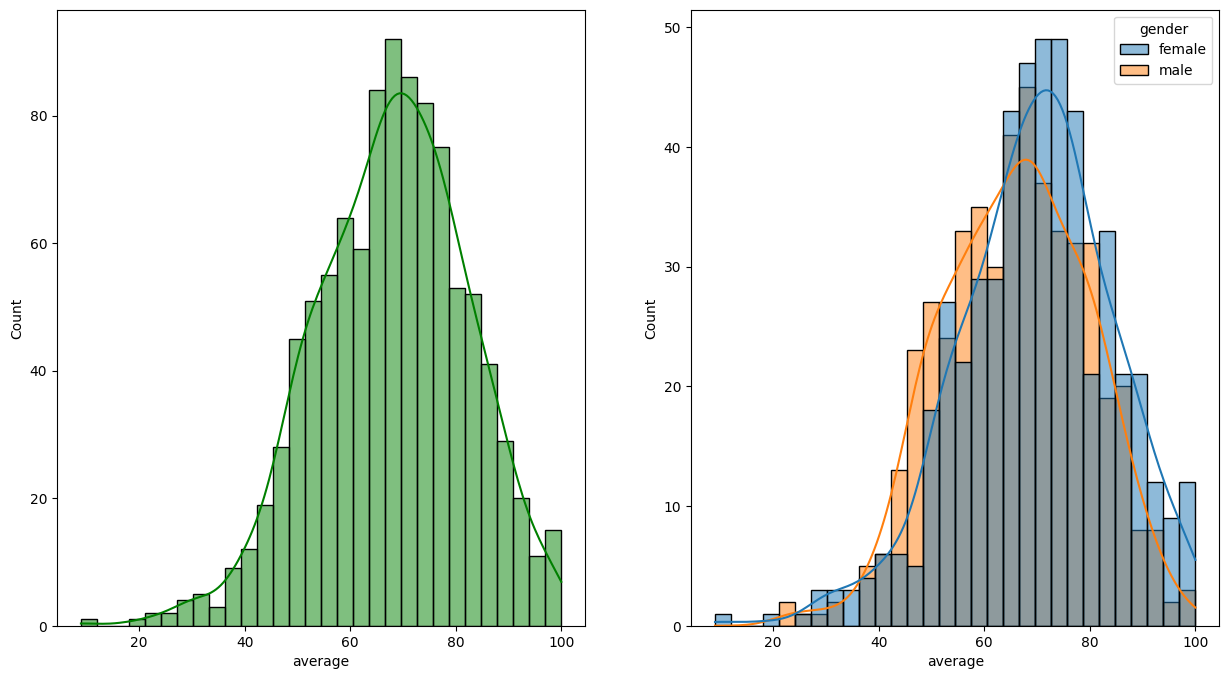

In [202]:
fig, axs=plt.subplots(1,2,figsize=(15,8))

plt.subplot(121)
sns.histplot(data=df_copy,x='average', bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df_copy,x='average', bins=30,kde=True,hue='gender')
plt.show()

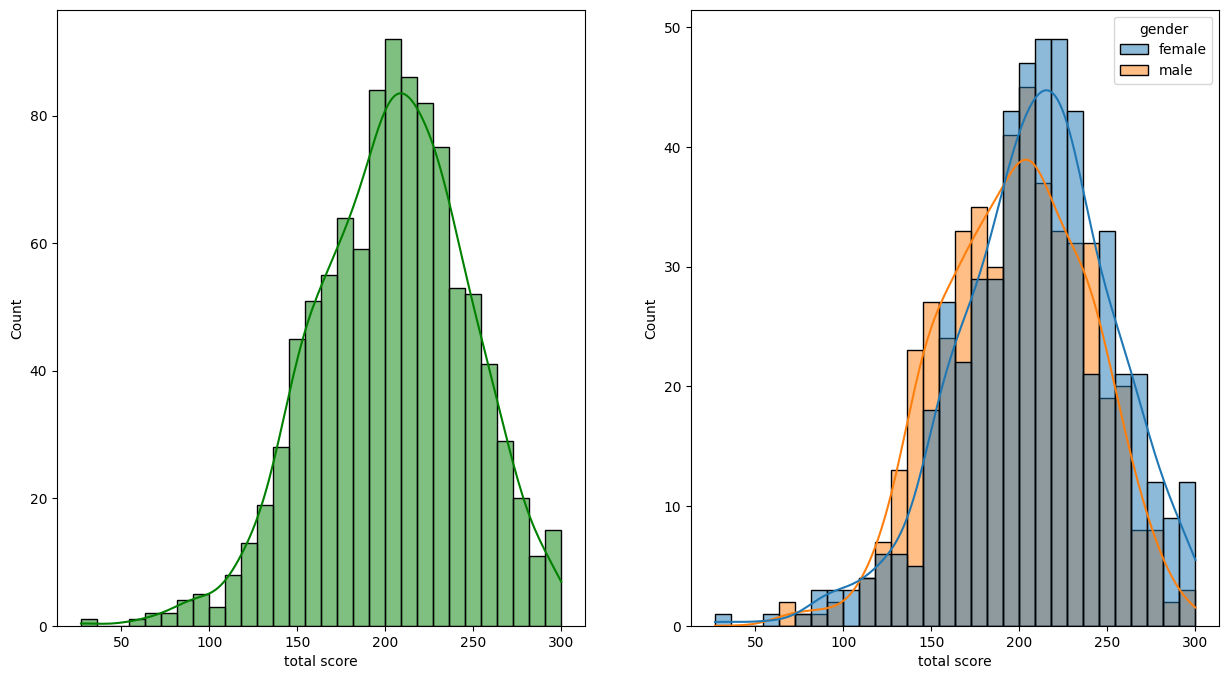

In [203]:
fig, axs=plt.subplots(1,2,figsize=(15,8))

plt.subplot(121)
sns.histplot(data=df_copy,x='total score', bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df_copy,x='total score', bins=30,kde=True,hue='gender')
plt.show()

### Insights
- Performance of femal students is better than male students.

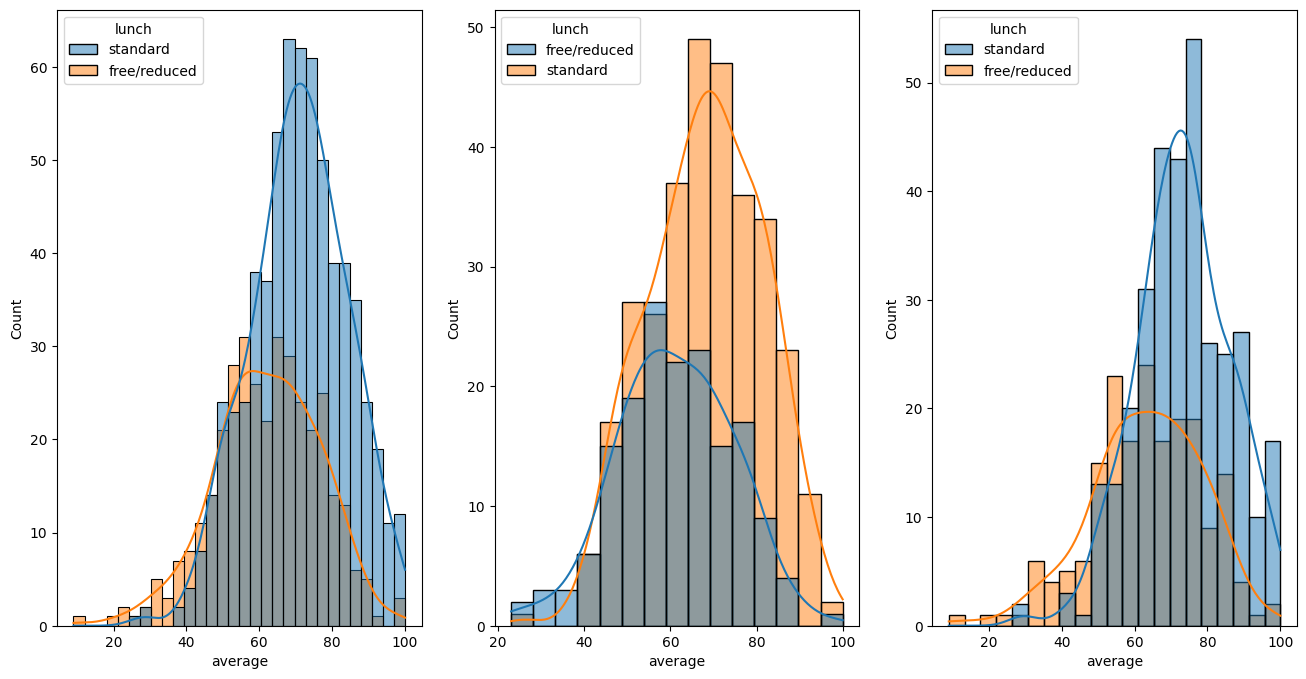

In [204]:
fig,gca = plt.subplots(1,3,figsize=(16,8))
plt.subplot(131)
sns.histplot(data=df_copy,x='average',kde=True,bins=30,hue='lunch')
plt.subplot(132)
sns.histplot(data=df_copy[df_copy['gender']=='male'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df_copy[df_copy['gender']=='female'],x='average',kde=True,hue='lunch')
plt.show()

#### Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

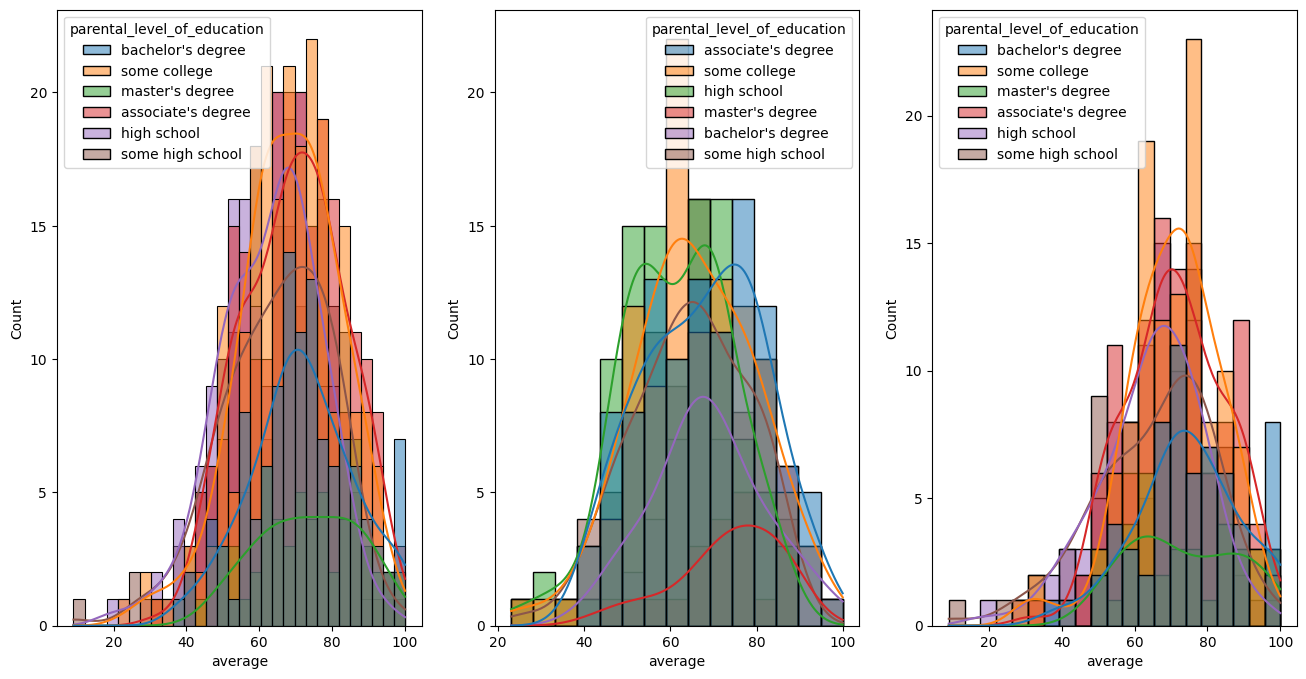

In [205]:
fig,gca = plt.subplots(1,3,figsize=(16,8))
plt.subplot(131)
sns.histplot(data=df_copy,x='average',kde=True,bins=30,hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df_copy[df_copy['gender']=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df_copy[df_copy['gender']=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

### Insights
- Parent education does not help student to perform well in exam.
- Students whoes parental education level is master's degree are performing poor compared to other students.
 

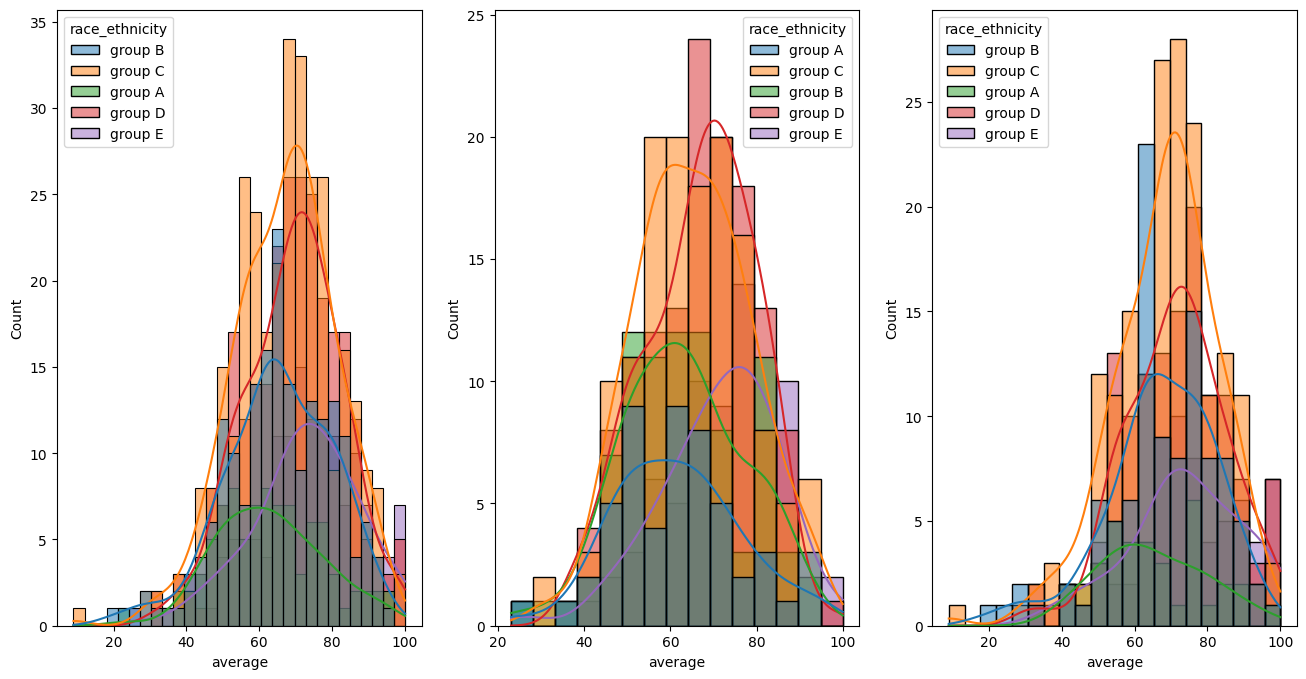

In [206]:
fig,gca = plt.subplots(1,3,figsize=(16,8))
plt.subplot(131)
sns.histplot(data=df_copy,x='average',kde=True,bins=30,hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df_copy[df_copy['gender']=='male'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df_copy[df_copy['gender']=='female'],x='average',kde=True,hue='race_ethnicity')
plt.show()

### Insights
- Students from Group A are performing poor compared to the other group students be it male or female.

## 4.2 Multivariant Analysis using Pie Plot

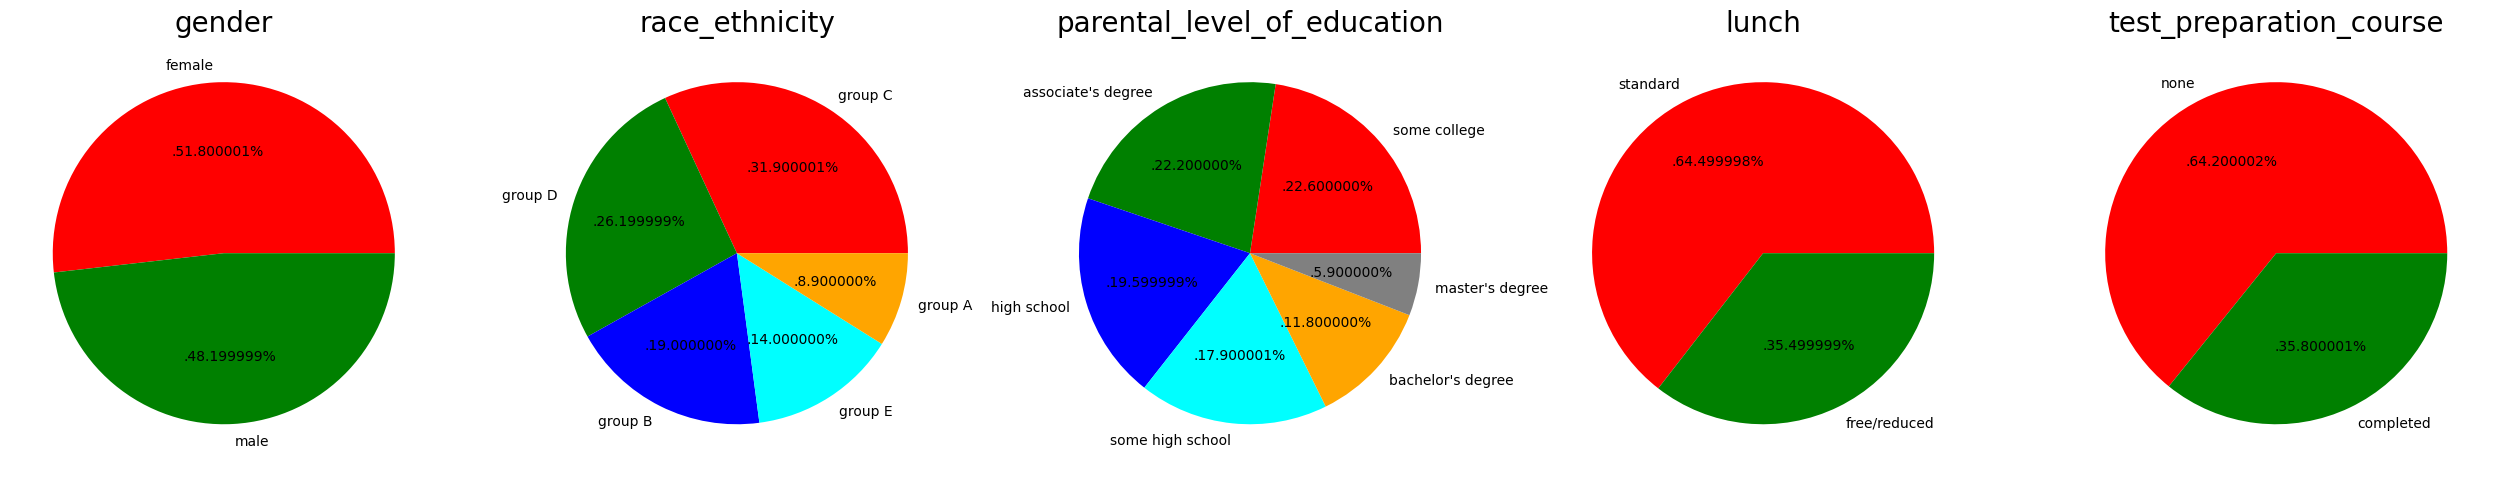

In [207]:
color_list=['red', 'green', 'blue', 'cyan','orange','grey']
plt.rcParams['figure.figsize'] = (32,16)
plt.subplots(1,5)

plt_count = 0
for column in categorical_features:
    plt_count=plt_count+1
    plt.subplot(1,5,plt_count)
    size = df_copy[column].value_counts()
    labels=df_copy[column].value_counts().index
    color=color_list[:size.size]

    plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
    plt.axis('off')
    plt.title(column, fontsize = 20)




### Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed
- closely by "Associate's Degree"

## 4.3 Feature wise Visualizations
### 4.3.1 Gender Column 
- How is distribution of gender?
- Is gender has any effect on student performance?

#### Univariant Analysis(How is distribution of gender?)

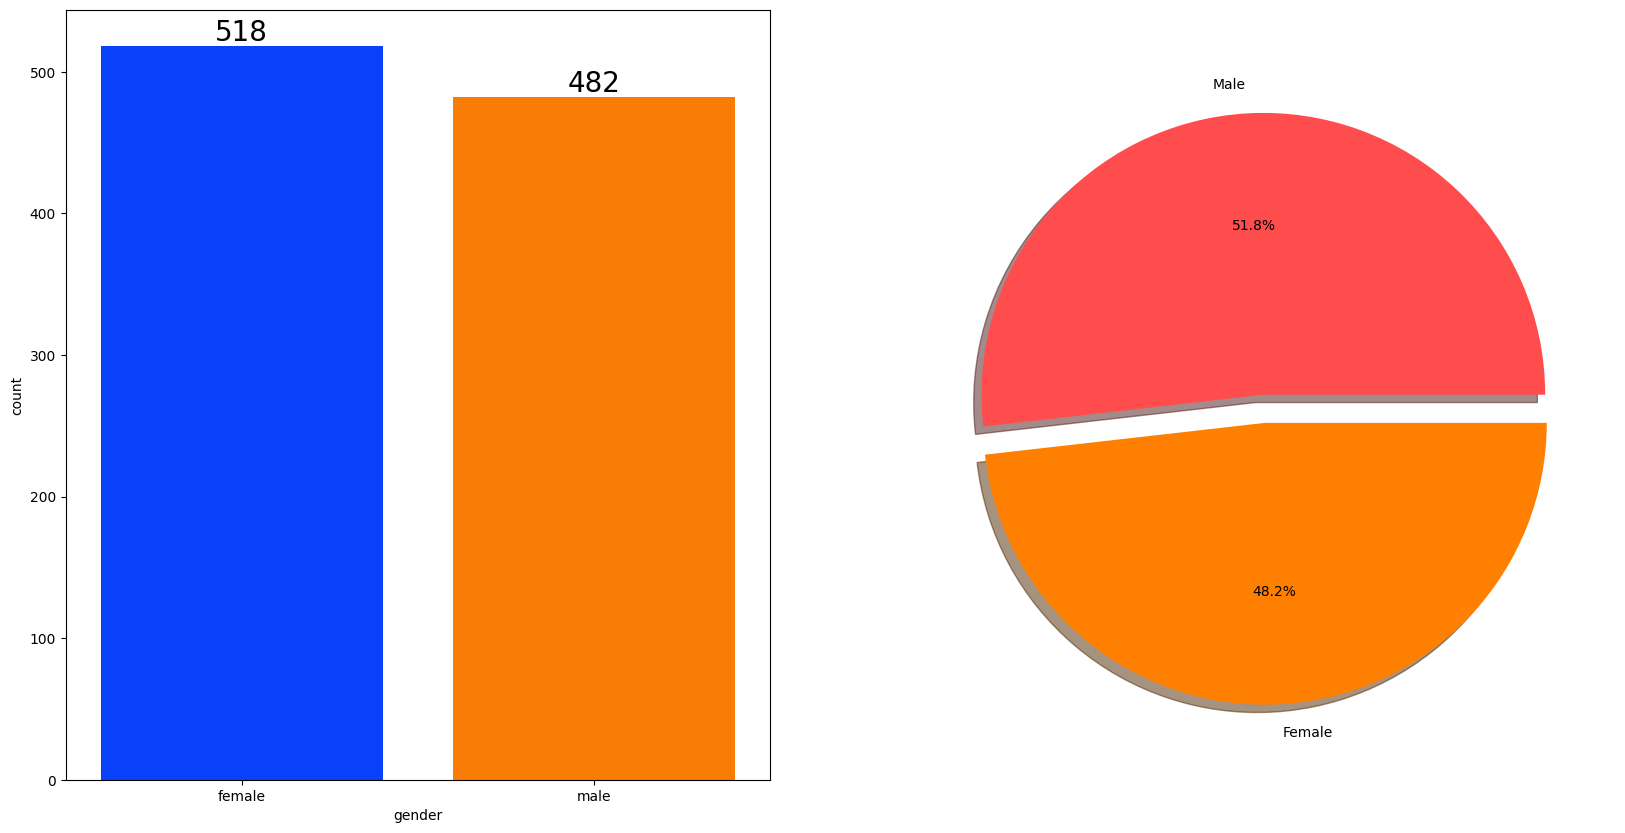

In [211]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df_copy['gender'],data=df_copy,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df_copy['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%).

#### Bivariant Analysis(Is gender has any impact on student's performance?)

In [220]:
gender_group = df_copy.groupby('gender').mean(numeric_only=True)
print(gender_group)

        math_score  reading_score  writing_score  total score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837303


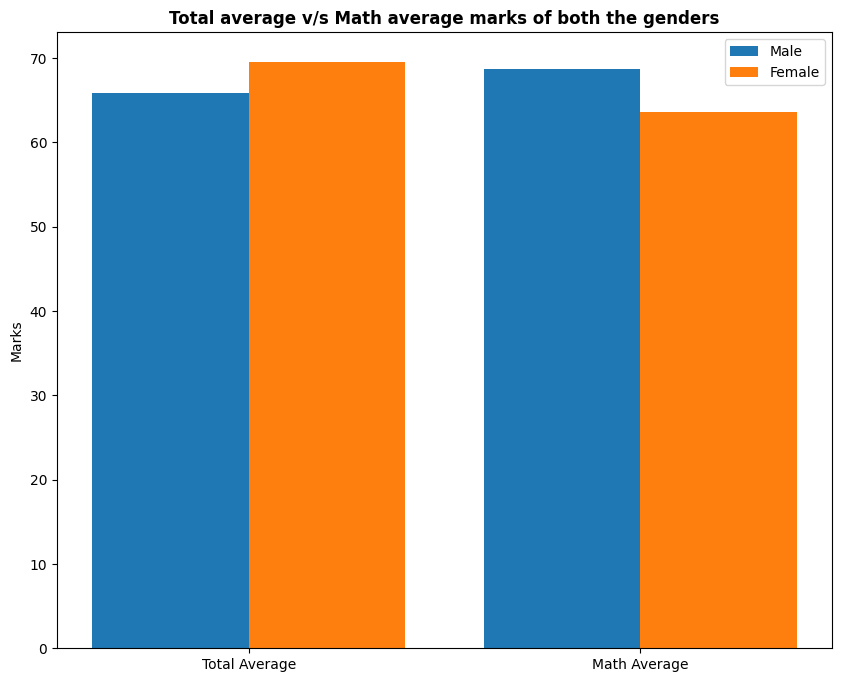

In [222]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights
- Average score of female is more than male.
- Male students have scored better in math compared to female students.

### 4.3.2 Race_Ethnicity Column
- How is Group wise distribution?
- Is Race/Ehnicity has any impact on student's performance?

#### UNIVARIATE ANALYSIS (How is Group wise distribution?)


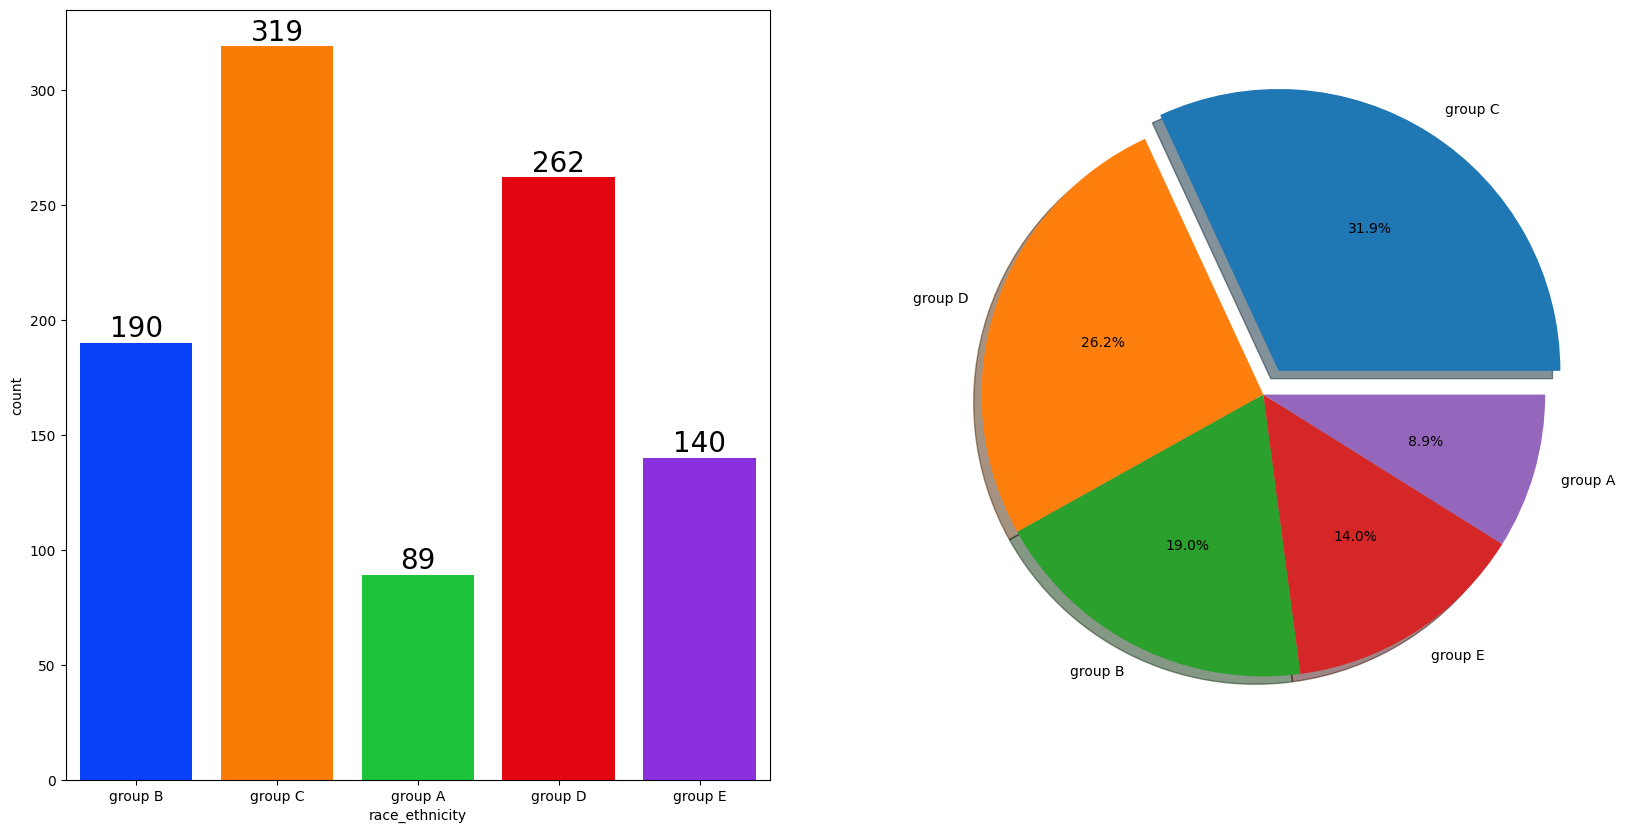

In [235]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df_copy['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df_copy['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()  

In [236]:
Group_data2=df_copy.groupby('race_ethnicity').mean(numeric_only=True)
print(Group_data2)

                math_score  reading_score  writing_score  total score  \
race_ethnicity                                                          
group A          61.629213      64.674157      62.674157   188.977528   
group B          63.452632      67.352632      65.600000   196.405263   
group C          64.463950      69.103448      67.827586   201.394984   
group D          67.362595      70.030534      70.145038   207.538168   
group E          73.821429      73.028571      71.407143   218.257143   

                  average  
race_ethnicity             
group A         62.992135  
group B         65.468579  
group C         67.131567  
group D         69.179389  
group E         72.752000  


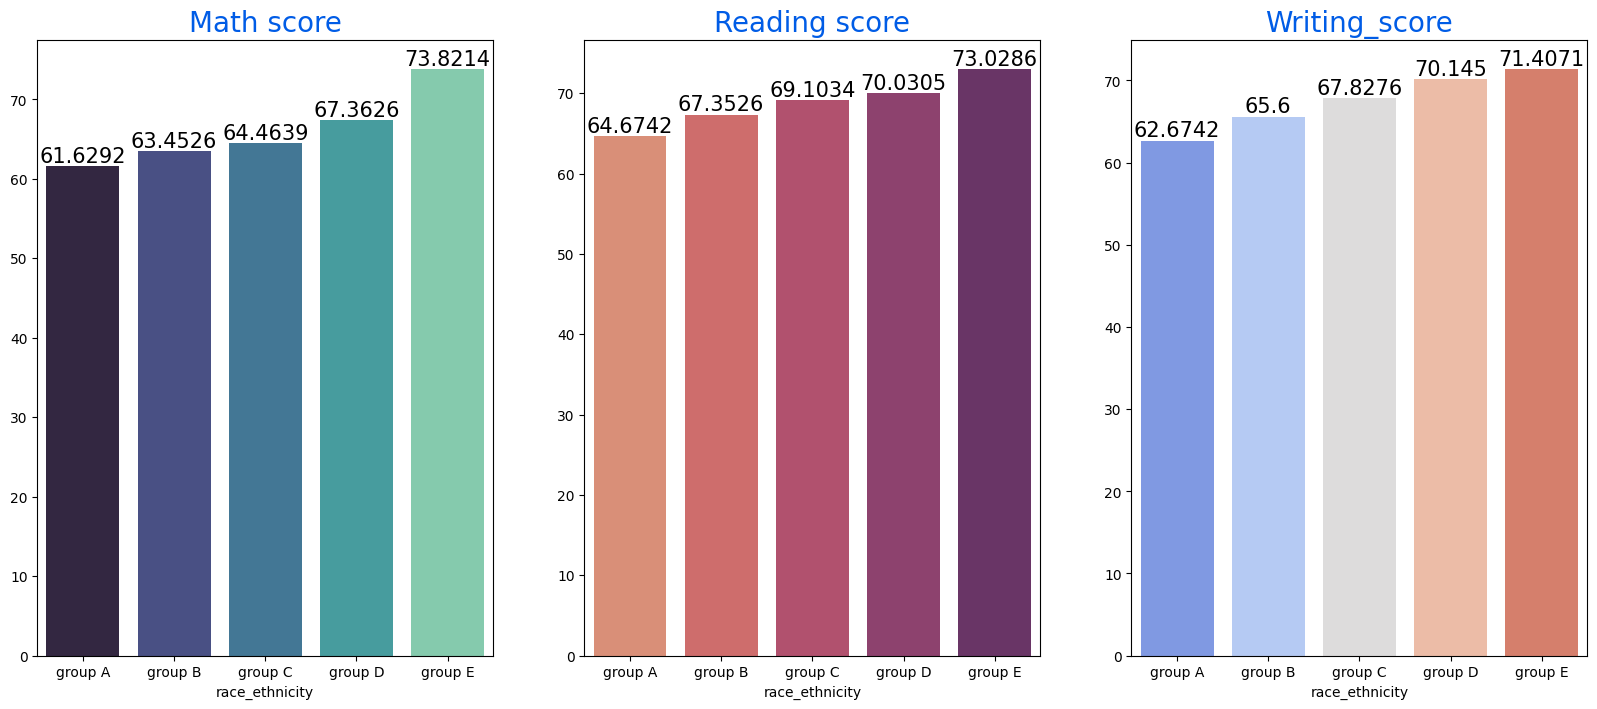

In [237]:

Group_data2=df_copy.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing_score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
  

### 4.3.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent?
- Is parental education has any impact on student's performance?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent? )


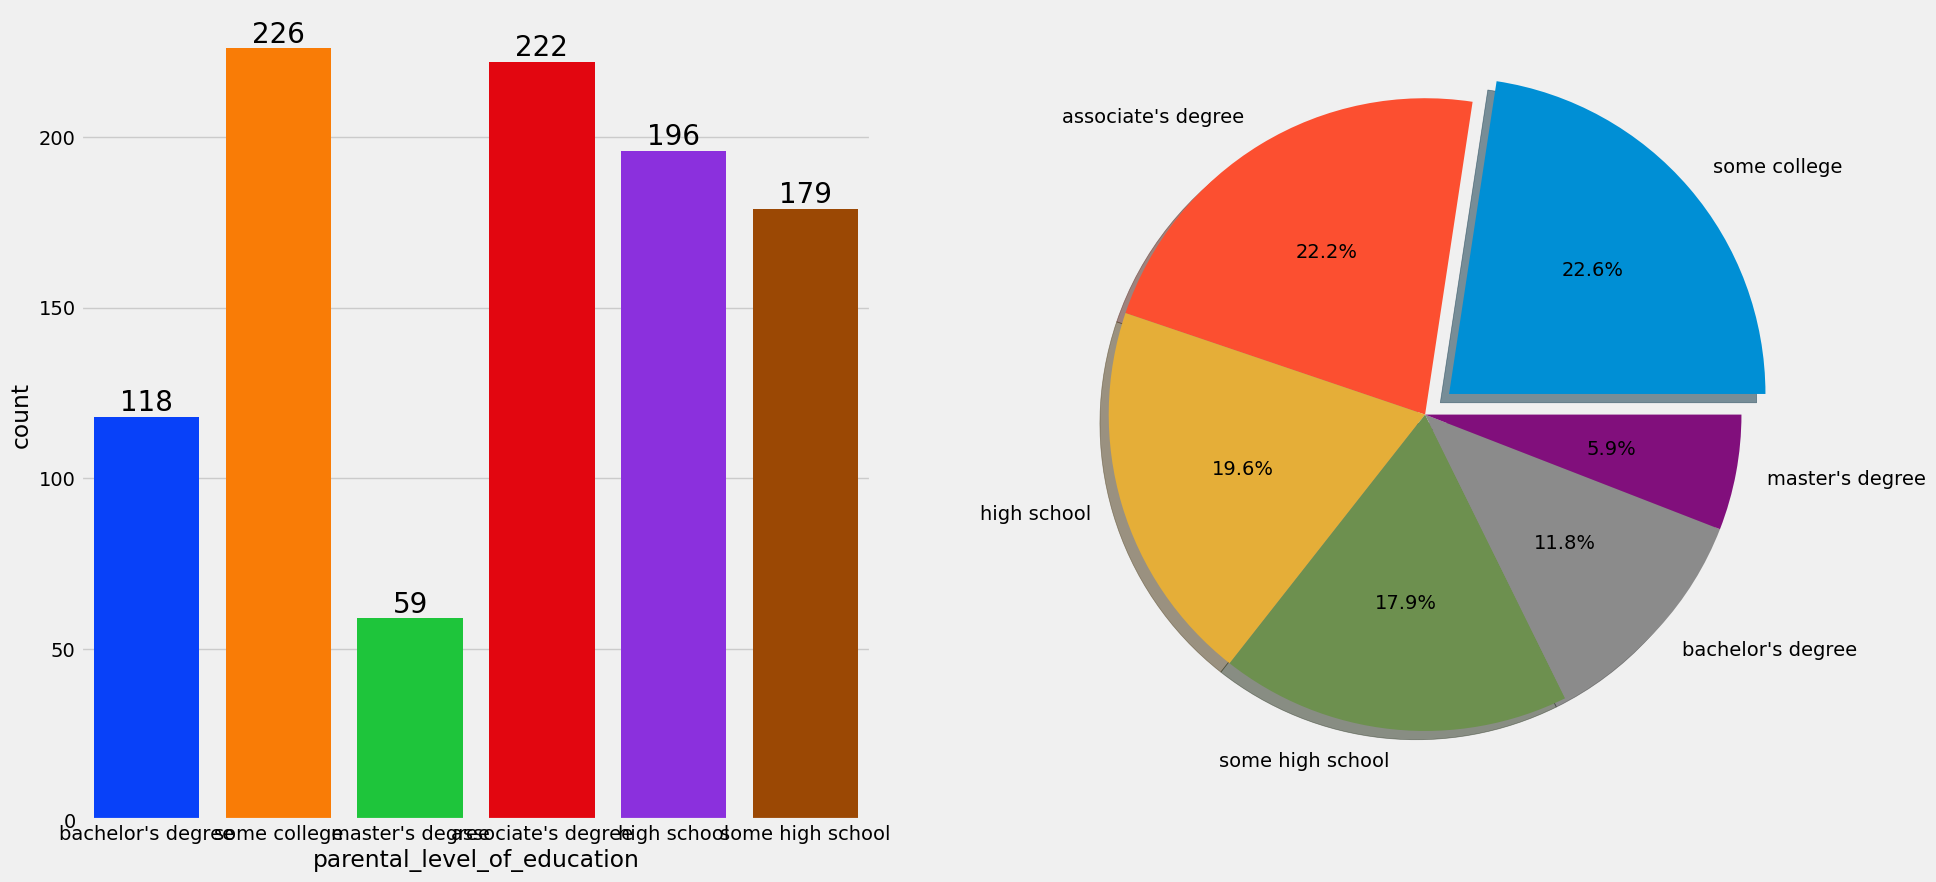

In [243]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df_copy['parental_level_of_education'],data=df_copy,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df_copy['parental_level_of_education'].value_counts(),labels=df_copy['parental_level_of_education'].value_counts().index,explode=[0.1,0,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()  



#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance? 

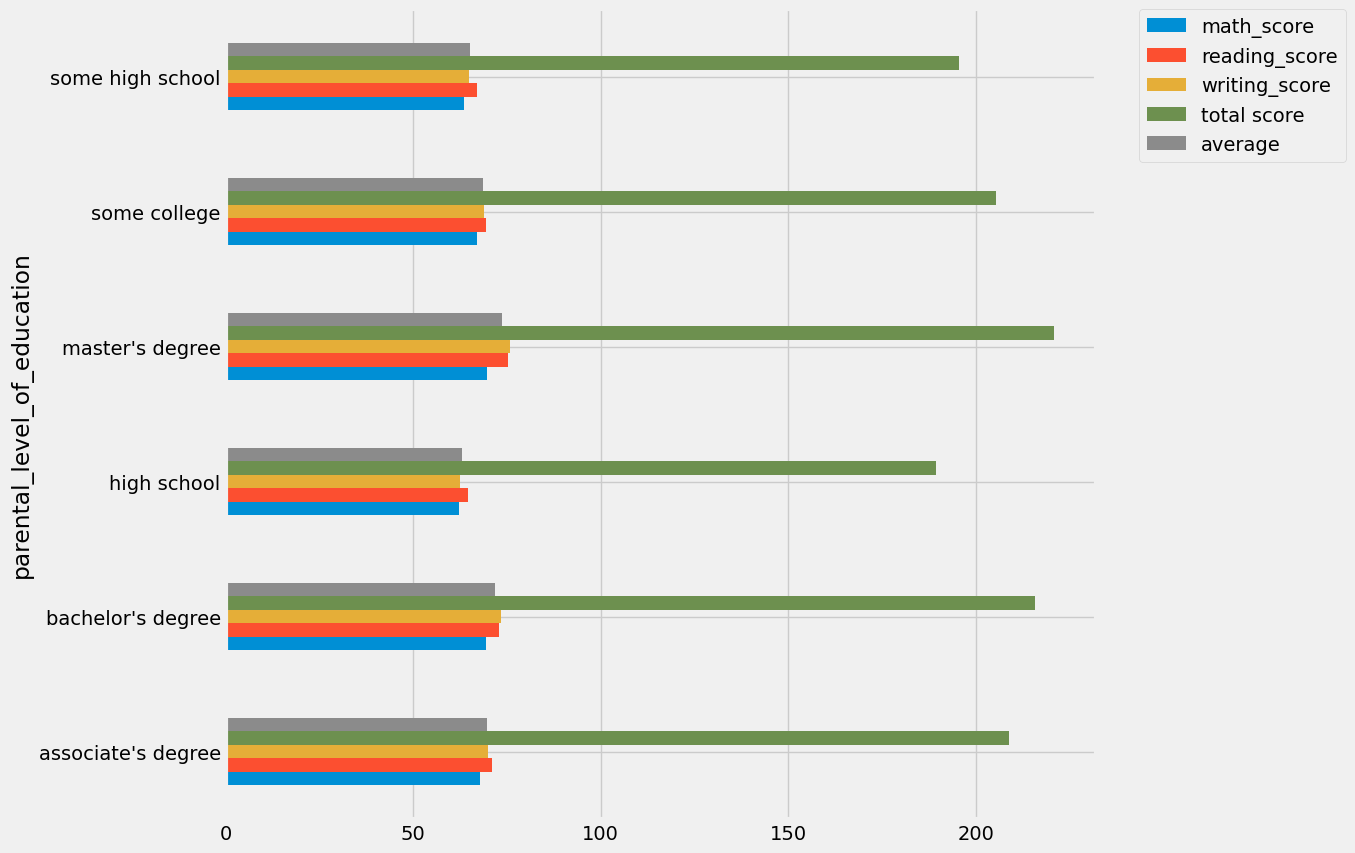

In [246]:
df_copy.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights
- Largest number of parents are from some college.
- The score of student whose parents possess master and bachelor level education are higher than others.

### 4.3.4 LUNCH COLUMN
- Which type of lunch is most common amoung students?
- What is the effect of lunch type on test results?

#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students? )

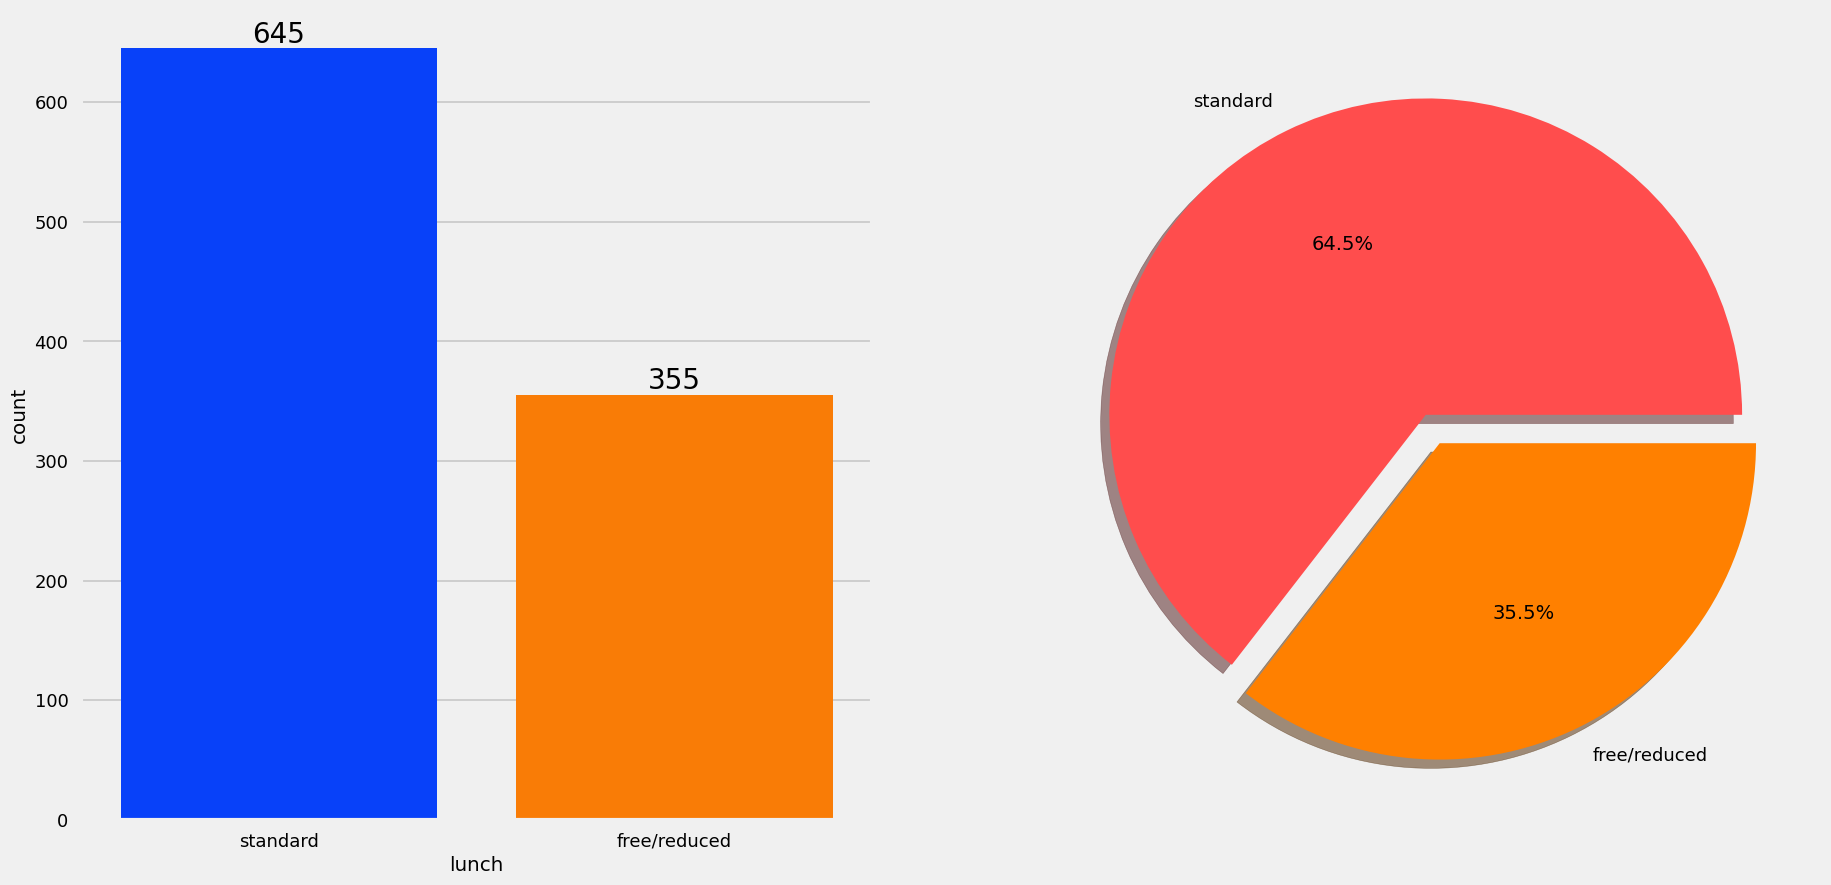

In [251]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df_copy['lunch'],data=df_copy,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df_copy['lunch'].value_counts(),labels=['standard','free/reduced'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### BIVARIATE ANALYSIS (Is lunch type intake has any impact on student's performance ?)

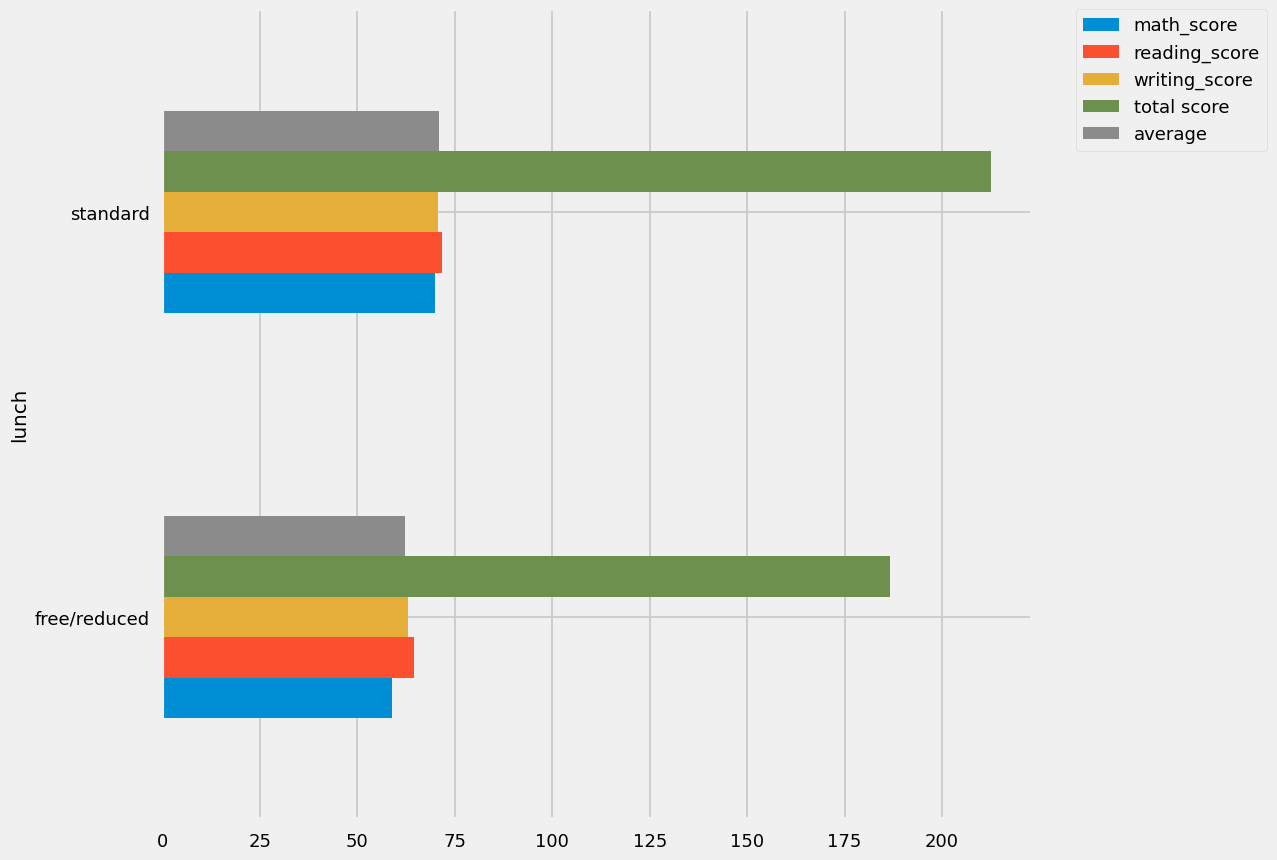

In [256]:
df_copy.groupby('lunch').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


#### Insights 
- Students being served Standard lunch was more than free lunch.
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch.

### 4.3.5 TEST PREPARATION COURSE COLUMN
- Which type of lunch is most common amoung students?
- Is Test prepration course has any impact on student's performance?

#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students? )

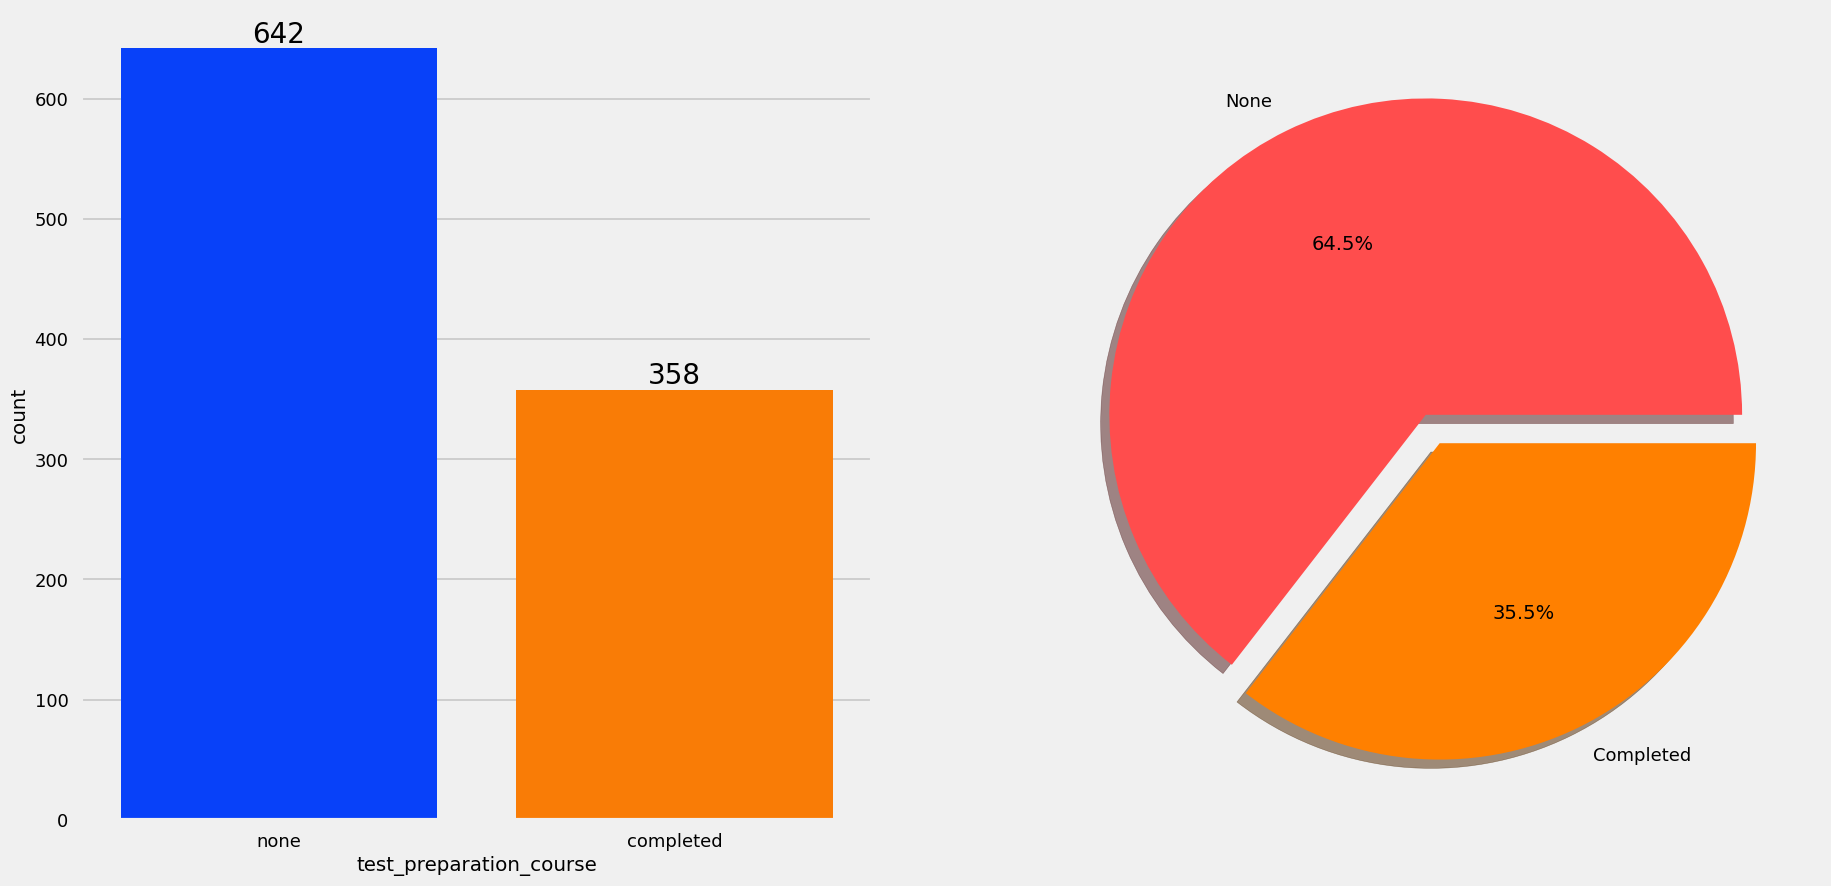

In [262]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df_copy['test_preparation_course'],data=df_copy,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df_copy['lunch'].value_counts(),labels=['None','Completed'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance? )

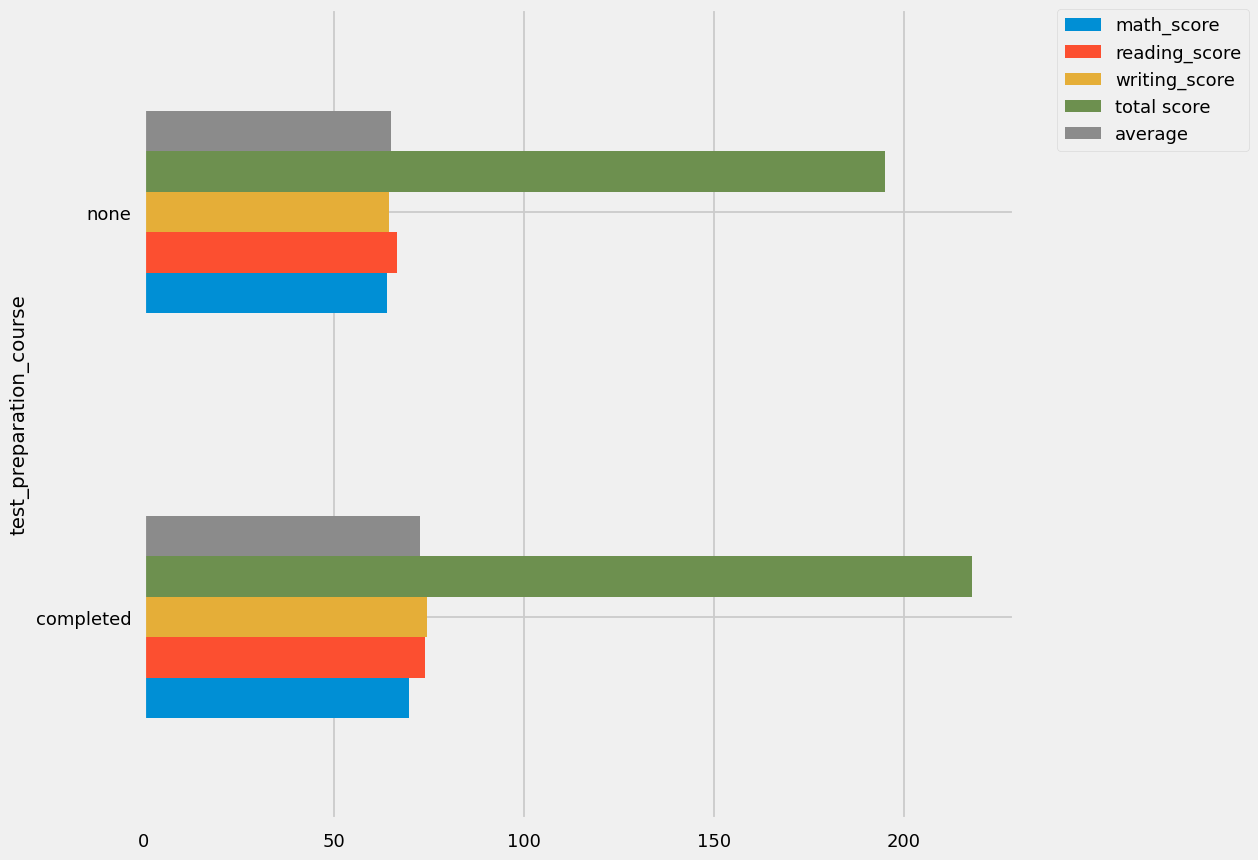

In [264]:
df_copy.groupby('test_preparation_course').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


#### Insights 
- Less number of students have completed the test preparation course.
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course.

### 4.3.6 Checking Outliers

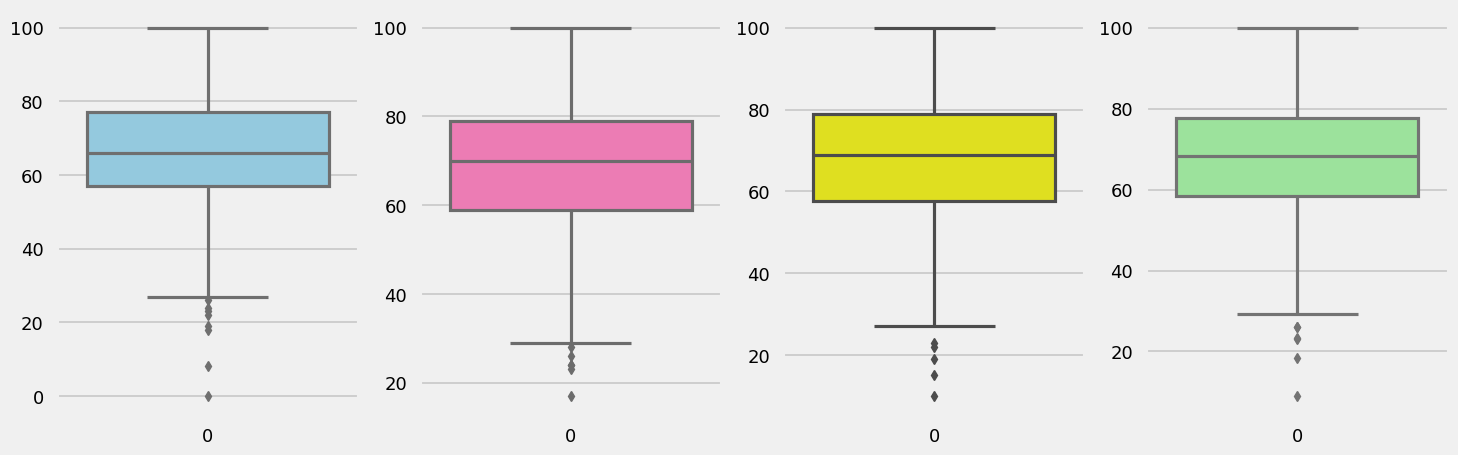

In [266]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df_copy['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df_copy['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df_copy['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df_copy['average'],color='lightgreen')
plt.show()

### 4.3.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

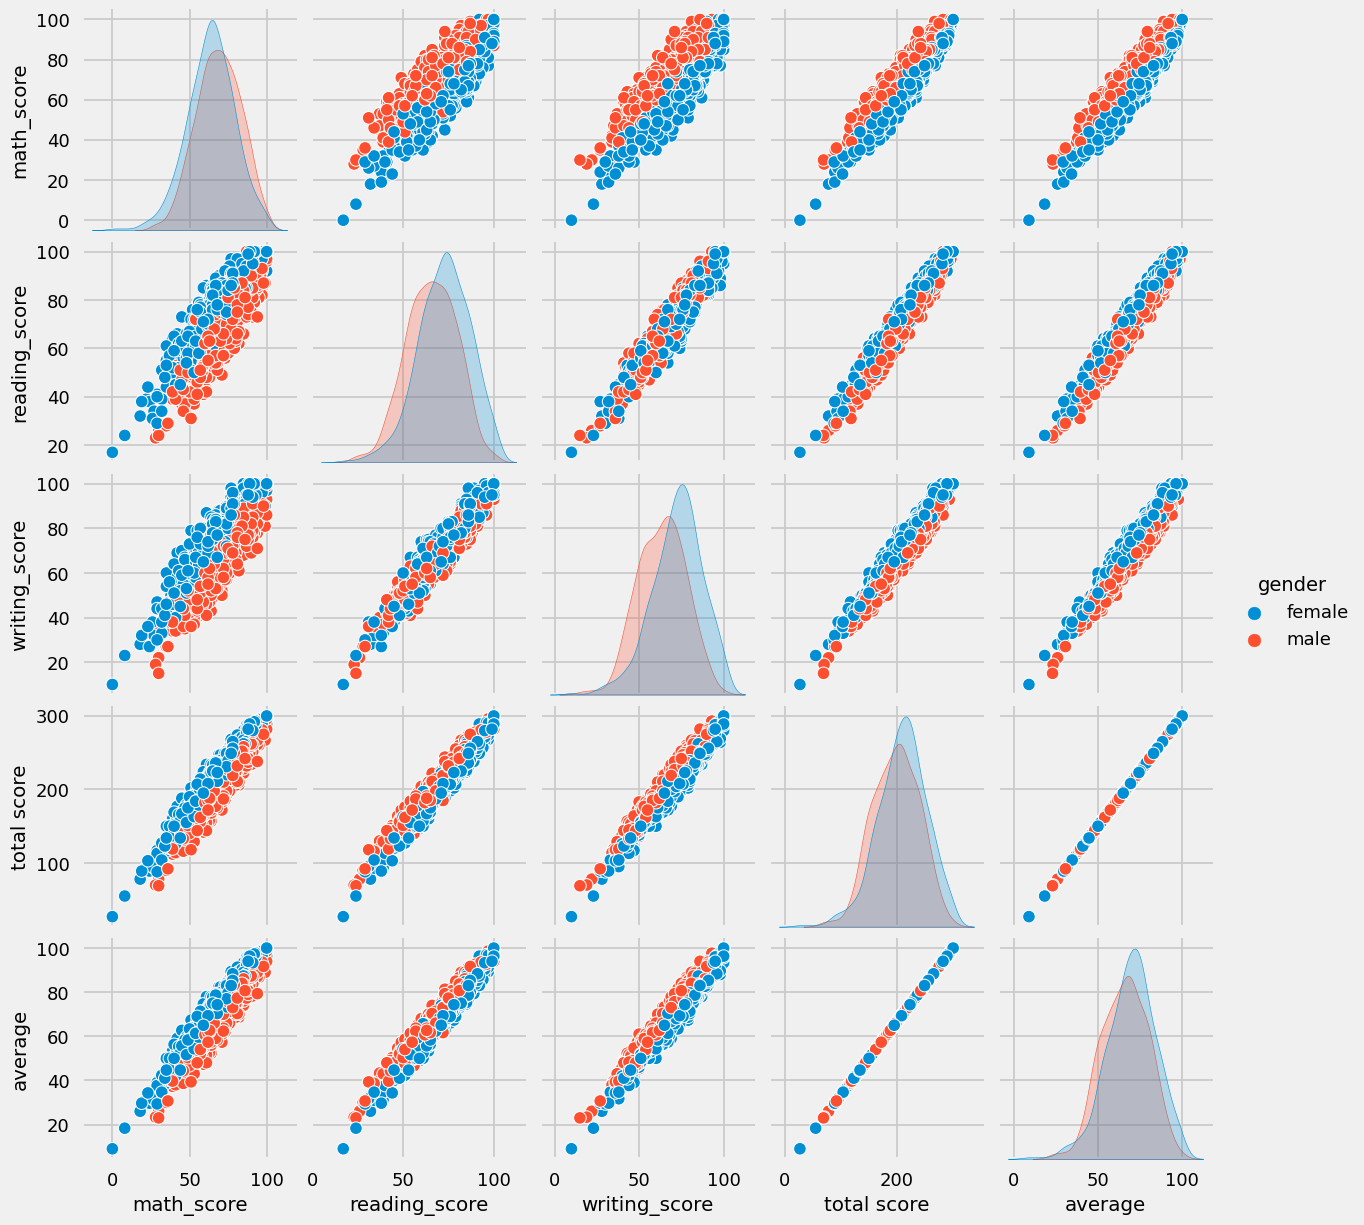

In [267]:
sns.pairplot(df_copy,hue = 'gender')
plt.show()

#### Insights
- From pairplots its clear that all the scores increase linearly with each other.

# Conclusion
- Student's Performance is related with lunch, race, parental level education.
- Females lead in pass percentage and also are top-scorers.
- Student's Performance is not much related with test preparation course.
- Finishing preparation course is benefitial.